In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
df = pd.read_csv('loan.csv')
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
181,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
318,LP002043,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
241,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
562,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211.0,360.0,1.0,Rural,Y


# EDA

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

here we can see the data is not balanced

In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.shape[0]

614

In [12]:
df.dropna().shape[0]


480

In [13]:
# Data loss 
(614-480)/614*100

21.824104234527688

In [14]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
for column, dtypes in df.dtypes.items():
    if df[column].isnull().sum() > 0:
        if dtypes == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].mean())

In [16]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

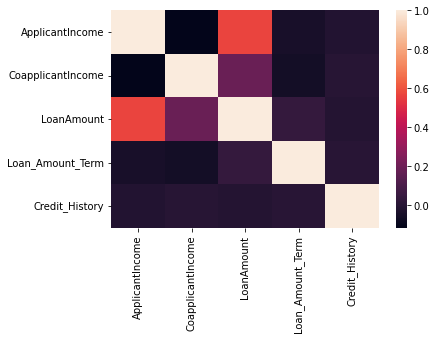

In [17]:
sns.heatmap(df.corr())

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


##  Univariate Analysis

In [23]:
df.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

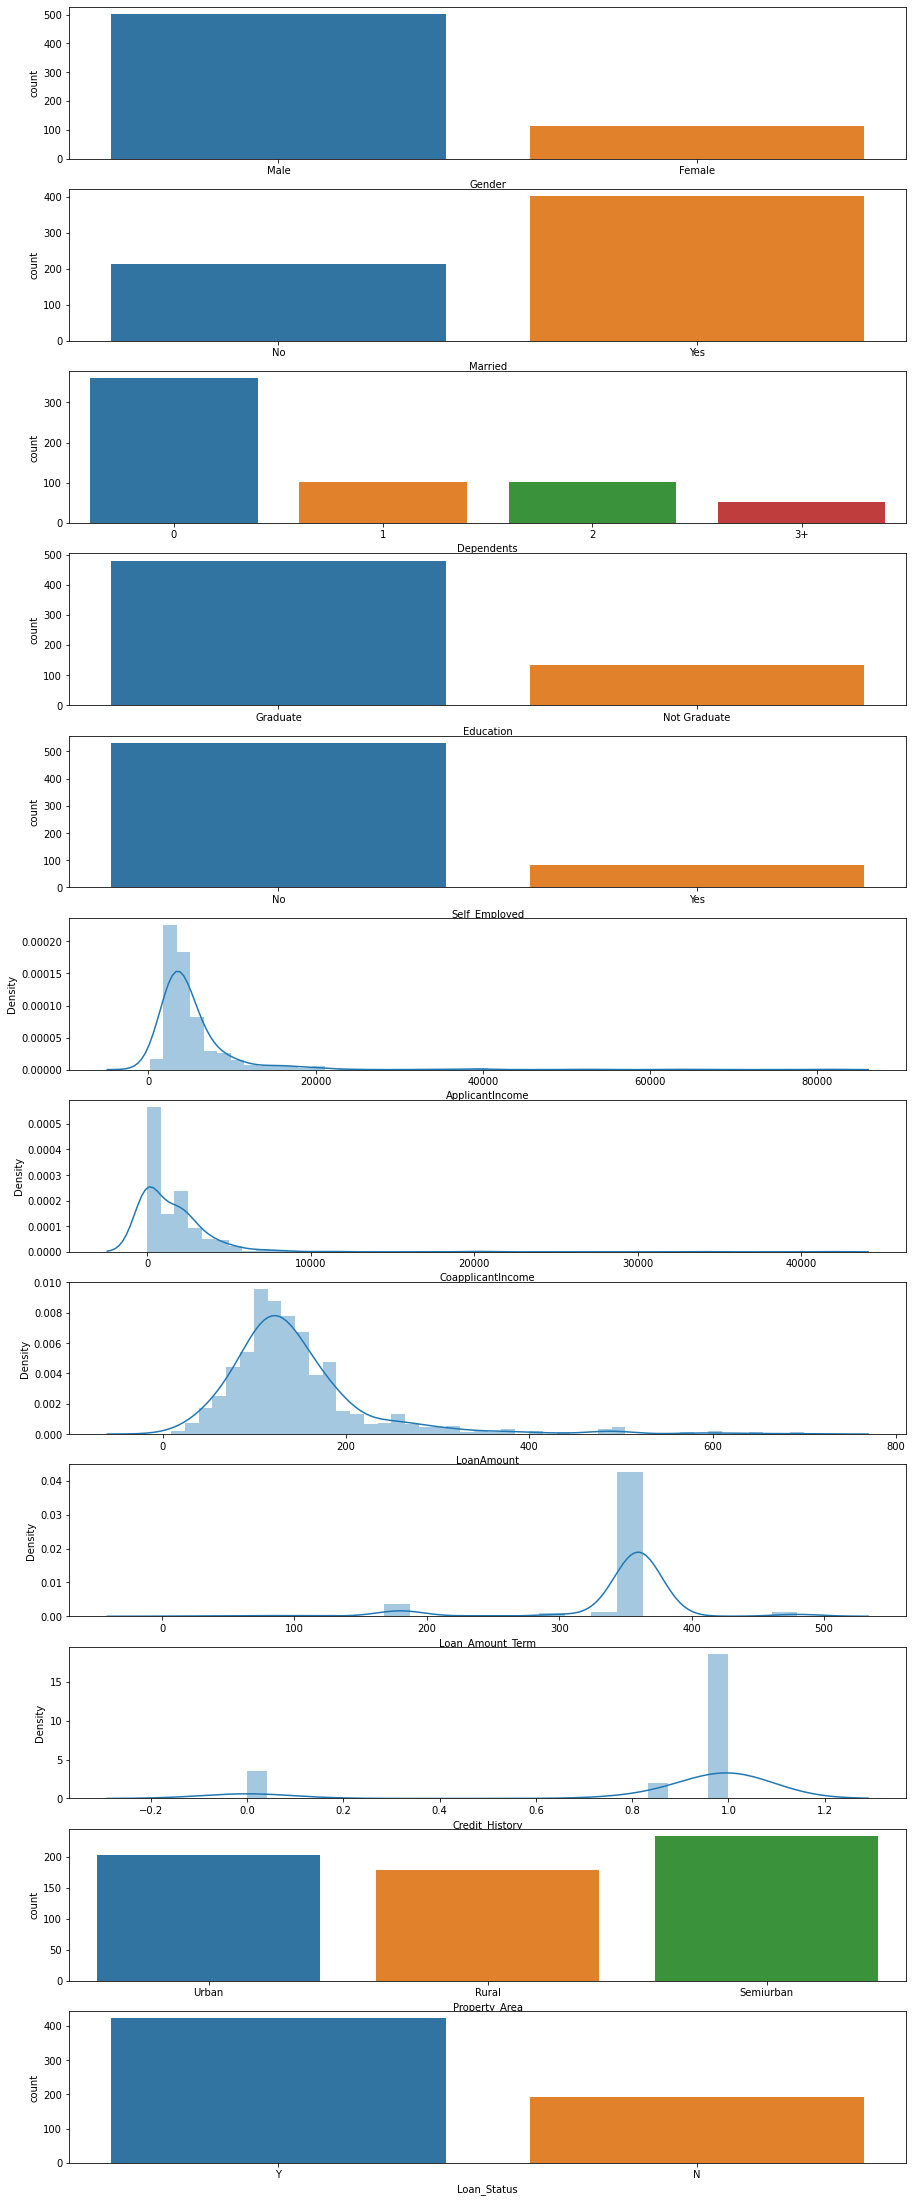

In [24]:
plt.figure(figsize=[15,100])
for i,column_data in enumerate(df.dtypes.items()):
    column, dtype  = column_data
    plt.subplot(30,1,i+1)
    
    if dtype == 'object':
        sns.countplot(df[column])
    else:
        sns.distplot(df[column],kde=True)

# Bivariate Analysis

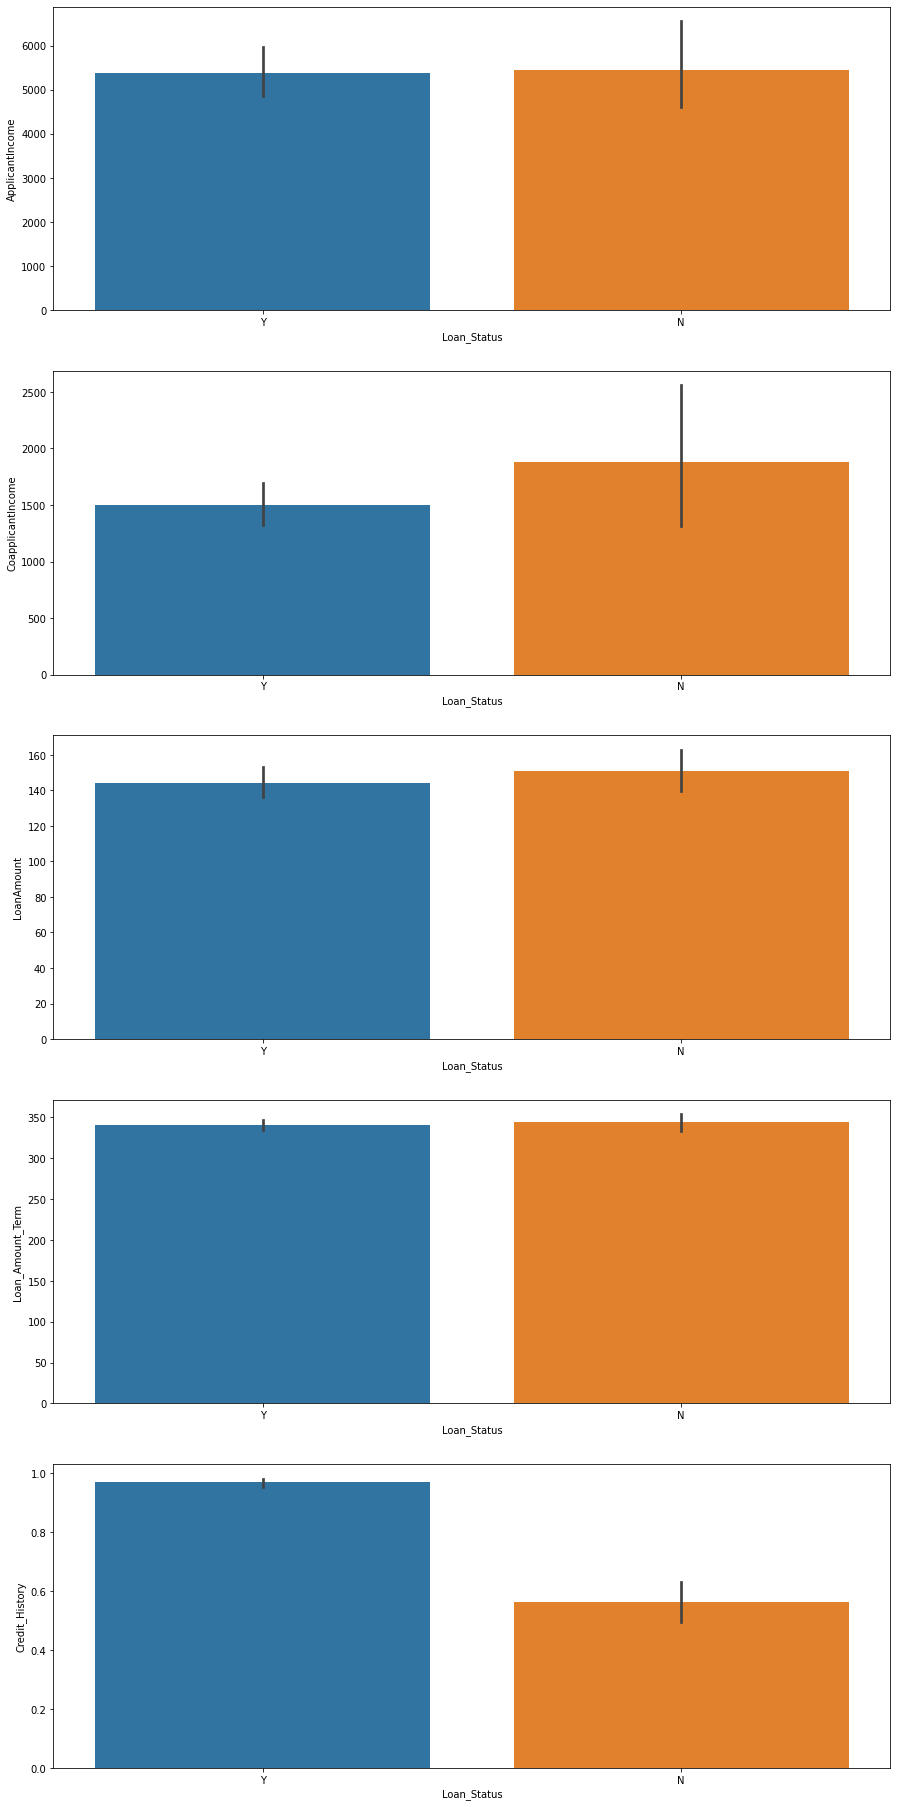

In [25]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop('Loan_Status',axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.barplot(df['Loan_Status'],df[column],)
        j += 1

# outliers

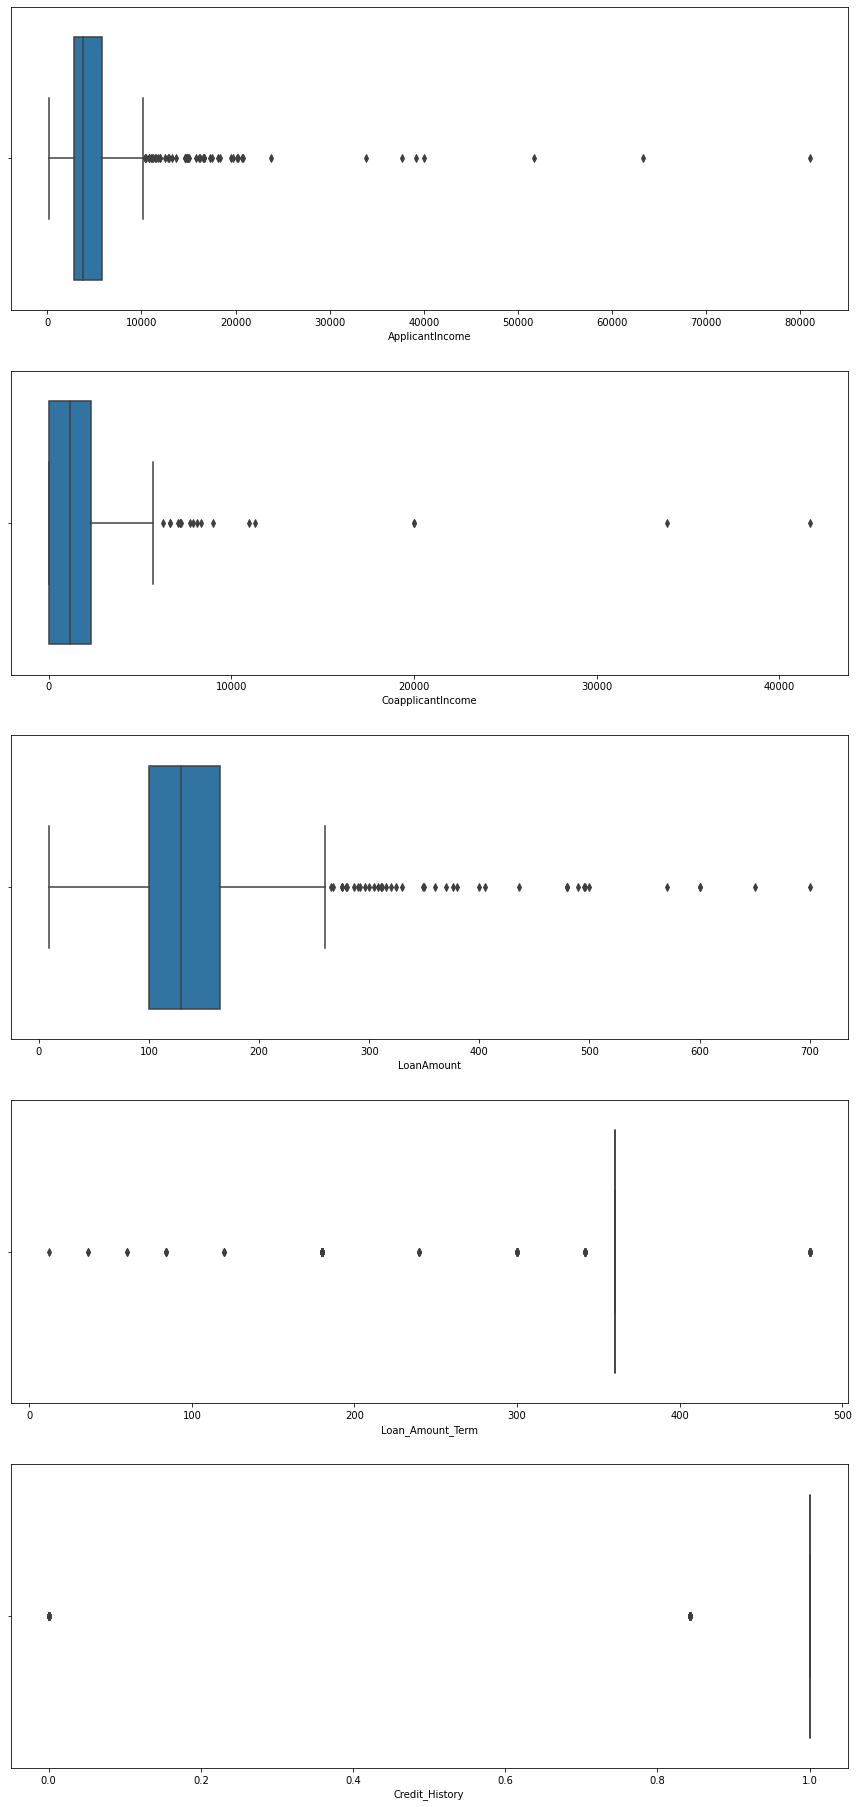

In [26]:
plt.figure(figsize=[15,200])
df_conti = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
j = 0 
for column, dtype in df_conti.dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.boxplot(df[column],)
        j += 1

In [27]:
df_conti[np.abs(stats.zscore(df_conti))>3].index

Int64Index([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
            183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
            432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
            600, 604],
           dtype='int64')

# label encoder

In [28]:
df = df.apply(LabelEncoder().fit_transform)

# Spliting the Data

In [29]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [30]:
df.skew().abs().sort_values()

ApplicantIncome      0.040993
Property_Area        0.066196
LoanAmount           0.458715
Married              0.644850
CoapplicantIncome    0.780870
Loan_Status          0.809998
Dependents           1.015551
Education            1.367622
Credit_History       1.606726
Gender               1.648795
Self_Employed        2.159796
Loan_Amount_Term     2.907201
dtype: float64

# Power Transform


In [31]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)

In [32]:
models = {
    'logisticRegression' : LogisticRegression(),
    'decisionTreeClassifier' : DecisionTreeClassifier(),
    'svc' : SVC(probability=True),
    'kNeighborsClassifier' : KNeighborsClassifier()
}

In [33]:
def build_model(model_obj):
    
    name, model = model_obj
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    accuracy_score = metrics.accuracy_score(y_test,y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
    fpr, tpr , _ = metrics.roc_curve(y_test,y_pred_proba)
    auc = metrics.roc_auc_score(y_test,y_pred_proba)
    
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr)
    plt.title('AUC ROC Curve for ' + name)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='accuracy',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(accuracy_score - mean_cv_scores)
    
    print('Confussion matrix: \n',confusion_matrix)
    print('\nscore: ',accuracy_score)
    print('auc: ',auc)
    plt.show()
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

----------------------------------
***** logisticRegression ******
----------------------------------
Confussion matrix: 
 [[27 27]
 [ 9 91]]

score:  0.7662337662337663
auc:  0.7237037037037037


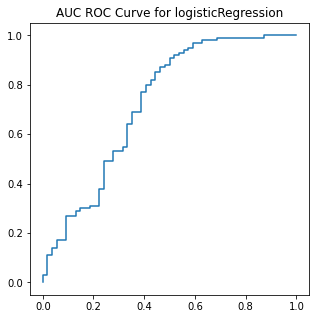

Cross Val Score:  0.7670891120675912
Cross Val std:  0.01674378011743948
Diff Between score and CV score:  0.0008553458338249609
__________________________________________
__________________________________________

----------------------------------
***** decisionTreeClassifier ******
----------------------------------
Confussion matrix: 
 [[30 24]
 [22 78]]

score:  0.7012987012987013
auc:  0.6677777777777778


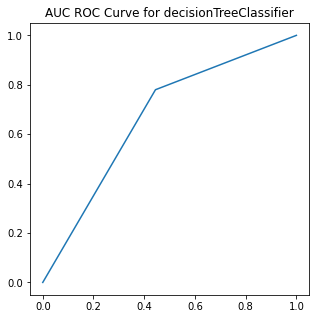

Cross Val Score:  0.6970588235294116
Cross Val std:  0.018399412946540804
Diff Between score and CV score:  0.0042398777692896905
__________________________________________
__________________________________________

----------------------------------
***** svc ******
----------------------------------
Confussion matrix: 
 [[27 27]
 [11 89]]

score:  0.7532467532467533
auc:  0.7614814814814815


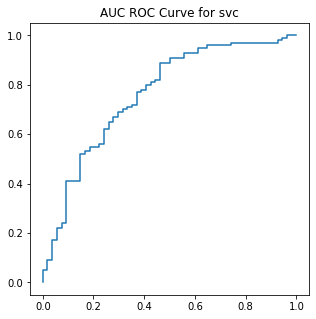

Cross Val Score:  0.7622110632871034
Cross Val std:  0.002619744060759306
Diff Between score and CV score:  0.008964310040350143
__________________________________________
__________________________________________

----------------------------------
***** kNeighborsClassifier ******
----------------------------------
Confussion matrix: 
 [[21 33]
 [ 9 91]]

score:  0.7272727272727273
auc:  0.6772222222222223


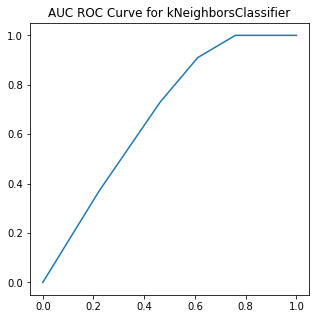

Cross Val Score:  0.7410648812370476
Cross Val std:  0.011464092857959247
Diff Between score and CV score:  0.01379215396432032
__________________________________________
__________________________________________



In [35]:
final_model_list = []
for one_model in models.items():
    
    name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'accuracy_score': accuracy_score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })

# Grid search CV 

In [36]:
sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['name']

'logisticRegression'

In [37]:
logisticRegression = sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['model']

In [38]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': [ 'l1', 'l2', 'elasticnet'],
    'C': [10,20,30],
    'fit_intercept' : [True,False],
}
gridSearchCV = GridSearchCV(LogisticRegression(),param_grid=param_grid,n_jobs=-1)
gridSearchCV.fit(X_train,y_train)
print(gridSearchCV.best_score_)
print(gridSearchCV.best_params_)

0.7717391304347826
{'C': 10, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Rajput Ankit singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rajput Ankit singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rajput Ankit singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rajput Ankit singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py",

# Saving the Model

In [39]:
pickle.dump(logisticRegression,open('logisticRegression.pkl','wb'))